## Fuzzy Project
## Predict Cardiovascular Disease Risk

### Team Members
- I Gede Krisna Ganesha Widhiarta (NIM: 103012300088)
- I Putu Justine Budi Wijaya (NIM: 103012300361)
- Ziyad Fathir Al Biaroza (NIM: 103012300455)

### Sneak Peek of the Code
Our team has decided to built this Cardiovascular Disease Risk Detection using Fuzzy Logic containing:
1. Input Variable: 
   - Age - age (Numeric, Classified by: Young, Adult, Old), 
   - Cholesterol - chol (Numeric, Classified by: Minimal, Medium, Extreme), 
   - Maximum Heart Rate - thalach (Numeric, Classified by: Slight, Moderate, Significant)
   - Blood Pressure - trestbps (Numeric, Classified by: Low, Normal, High),    

2. Output Variable: 
   - Risk (Classified by: Mild, Noticeable, Severe) 

`1. Import Required Library`

In [586]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tabulate as tl
from sklearn.metrics import accuracy_score, f1_score, classification_report

`2. Read CSV Dataset using Pandas`

In [587]:
# Convert CSV file into DataFrame (A Table-Like Structure for Data)
df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


`3. Fuzzification`

Rumus yang digunakan adalah Fungsi Keanggotaan Segitiga (Triangular) 

Rumus naik : $\frac{b-a}{x-a}$

Rumus turun : $\frac{c-x}{c-b}$


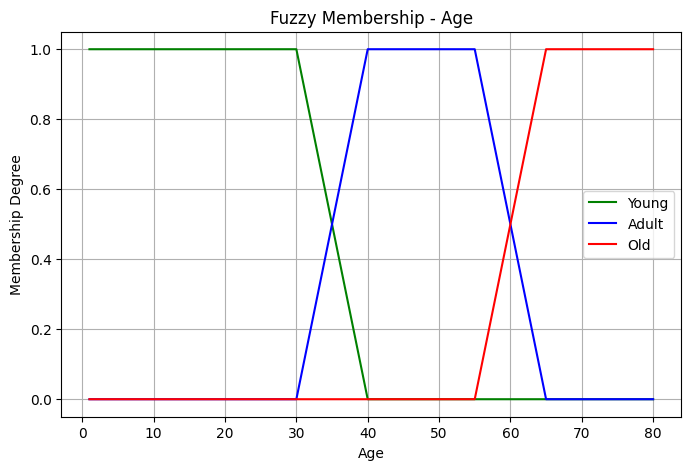

In [588]:
# Age
def fuzzy_age(age):
    usia = {"Young": 0, "Adult": 0, "Old": 0}
    a1, a2, a3, a4 = 30, 40, 55, 65

    if age <= a1:  # Jika umurnya dibawah 30 dianggap Young
        usia["Young"] = 1 # 1 menyatakan angka yang fix dan mutlak
    elif a1 < age < a2:
        usia["Young"] = float((a2 - age) / (a2 - a1))  # cara menggunakannya cth umur 35, maka terdefinisi (40-35)/(40-30) = 0.5
        usia["Adult"] = float((age - a1) / (a2 - a1))  # cara menggunakannya cth umur 35, maka terdefinisi (35-30)/(40-30) = 0.5
    elif a2 <= age <= a3:                       # Karena sama sama 0.5 artinya umur 35 dianggap 50% Young dan 50% Adult
        usia["Adult"] = 1
    elif a3 < age < a4:
        usia["Adult"] = float((a4 - age) / (a4 - a3))
        usia["Old"] = float((age - a3) / (a4 - a3))
    elif age >= a4:
        usia["Old"] = 1
    return usia

# Visualisasi Age
x1 = [1, 30, 40, 80]  # Young
y1 = [1, 1, 0, 0]

x2 = [1, 30, 40, 55, 65, 80] # Adult
y2 = [0, 0, 1, 1, 0, 0]

x3 = [1, 55, 65, 80] # Old
y3 = [0, 0, 1, 1]

# Grafik Umur
plt.figure(figsize=(8,5))
plt.title("Fuzzy Membership - Age")
plt.plot(x1, y1, label="Young", color="green")
plt.plot(x2, y2, label="Adult", color="blue")
plt.plot(x3, y3, label="Old", color="red")
plt.xlabel("Age")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()


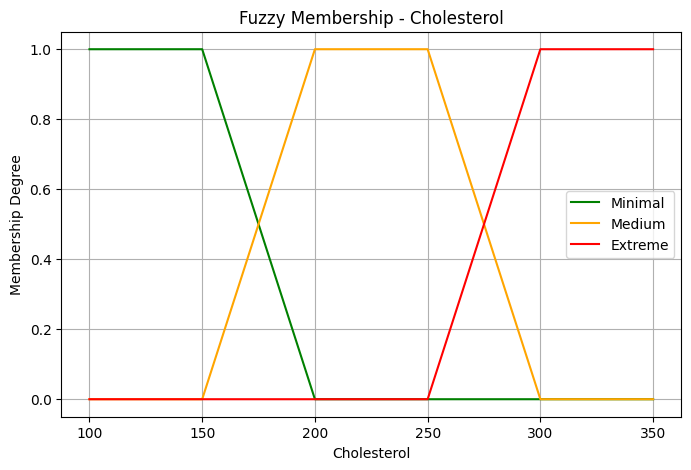

In [589]:
# Cholestrol
def fuzzy_chol(chol):
    kolesterol = {"Minimal": 0, "Medium": 0, "Extreme": 0}
    c1, c2, c3, c4 = 150, 200, 250, 300

    if chol <= c1:
        kolesterol["Minimal"] = 1
    elif c1 < chol < c2:
        kolesterol["Minimal"] = float((c2 - chol) / (c2 - c1))
        kolesterol["Medium"] = float((chol - c1) / (c2 - c1))
    elif c2 <= chol <= c3:
        kolesterol["Medium"] = 1
    elif c3 < chol < c4:
        kolesterol["Medium"] = float((c4 - chol) / (c4 - c3))
        kolesterol["Extreme"] = float((chol - c3) / (c4 - c3))
    elif chol >= c4:
        kolesterol["Extreme"] = 1

    return kolesterol

# Visualisasi Cholestrol
x1 = [100, 150, 200, 350]     # Minimal
y1 = [1, 1, 0, 0]

x2 = [100, 150, 200, 250, 300, 350]  # Medium
y2 = [0, 0, 1, 1, 0, 0]

x3 = [100, 250, 300, 350]     # Extreme
y3 = [0, 0, 1, 1]

plt.figure(figsize=(8,5))
plt.title("Fuzzy Membership - Cholesterol")
plt.plot(x1, y1, label="Minimal", color="green")
plt.plot(x2, y2, label="Medium", color="orange")
plt.plot(x3, y3, label="Extreme", color="red")
plt.xlabel("Cholesterol")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()

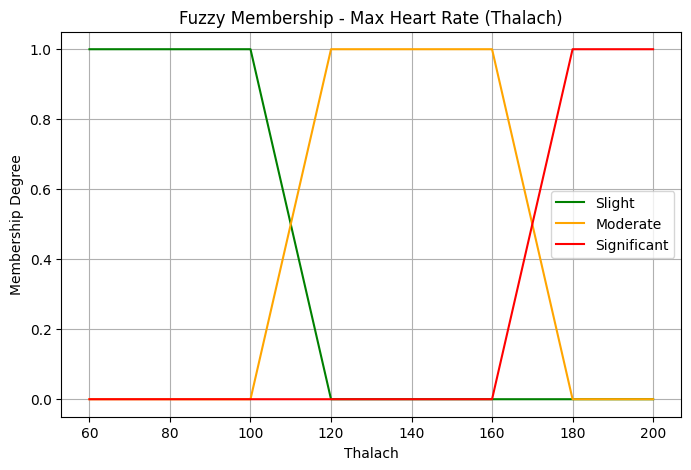

In [590]:
# Maximum Heart Rate
def fuzzy_thalach(thalach):
    detak = {"Slight": 0, "Moderate": 0, "Significant": 0}
    t1, t2, t3, t4 = 100, 120, 160, 180

    if thalach <= t1:
        detak["Slight"] = 1
    elif t1 < thalach < t2:
        detak["Slight"] = float((t2 - thalach) / (t2 - t1))
        detak["Moderate"] = float((thalach - t1) / (t2 - t1))
    elif t2 <= thalach <= t3:
        detak["Moderate"] = 1
    elif t3 < thalach < t4:
        detak["Moderate"] = float((t4 - thalach) / (t4 - t3))
        detak["Significant"] = float((thalach - t3) / (t4 - t3))
    elif thalach >= t4:
        detak["Significant"] = 1

    return detak

# Visualisasi Thalach
x1 = [60, 100, 120, 200]        # Slight
y1 = [1, 1, 0, 0]

x2 = [60, 100, 120, 160, 180, 200]  # Moderate
y2 = [0, 0, 1, 1, 0, 0]

x3 = [60, 160, 180, 200]       # Significant
y3 = [0, 0, 1, 1]

plt.figure(figsize=(8,5))
plt.title("Fuzzy Membership - Max Heart Rate (Thalach)")
plt.plot(x1, y1, label="Slight", color="green")
plt.plot(x2, y2, label="Moderate", color="orange")
plt.plot(x3, y3, label="Significant", color="red")
plt.xlabel("Thalach")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()

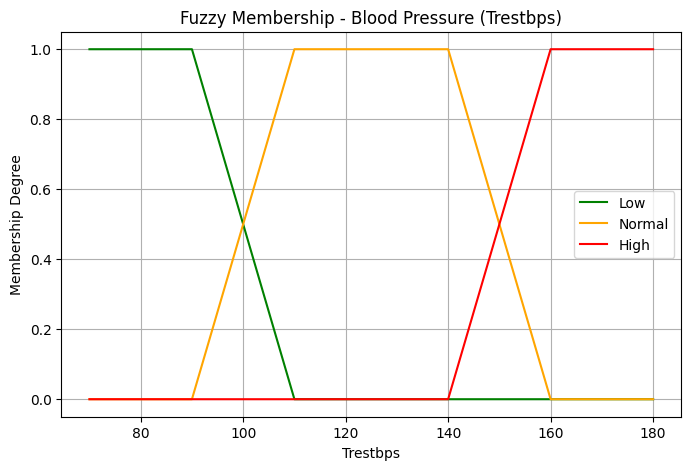

In [591]:
# Blood Pressure
def fuzzy_trestbps(trestbps):
    tekanan = {"Low": 0, "Normal": 0, "High": 0}
    b1, b2, b3, b4 = 90, 110, 140, 160

    if trestbps <= b1:
        tekanan["Low"] = 1
    elif b1 < trestbps < b2:
        tekanan["Low"] = float((b2 - trestbps) / (b2 - b1))
        tekanan["Normal"] = float((trestbps - b1) / (b2 - b1))
    elif b2 <= trestbps <= b3:
        tekanan["Normal"] = 1
    elif b3 < trestbps < b4:
        tekanan["Normal"] = float((b4 - trestbps) / (b4 - b3))
        tekanan["High"] = float((trestbps - b3) / (b4 - b3))
    elif trestbps >= b4:
        tekanan["High"] = 1

    return tekanan

# Visualisasi Trestbps
x1 = [70, 90, 110, 180]        # Low
y1 = [1, 1, 0, 0]

x2 = [70, 90, 110, 140, 160, 180]  # Normal
y2 = [0, 0, 1, 1, 0, 0]

x3 = [70, 140, 160, 180]      # High
y3 = [0, 0, 1, 1]

plt.figure(figsize=(8,5))
plt.title("Fuzzy Membership - Blood Pressure (Trestbps)")
plt.plot(x1, y1, label="Low", color="green")
plt.plot(x2, y2, label="Normal", color="orange")
plt.plot(x3, y3, label="High", color="red")
plt.xlabel("Trestbps")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()

In [592]:
# Hasil Fuzifikasi Data
fuzzified_data = []

for _, row in df.iterrows():
    fuzzy_values = {
        "age": fuzzy_age(row["age"]),
        "chol": fuzzy_chol(row["chol"]),
        "thalach": fuzzy_thalach(row["thalach"]),
        "trestbps": fuzzy_trestbps(row["trestbps"])
    }
    fuzzified_data.append(fuzzy_values)

# Cetak hasil 10 baris pertama
for i in range(10):
    print(f"Data ke-{i+1}")
    print("Age       :", fuzzified_data[i]['age'])
    print("Chol      :", fuzzified_data[i]['chol'])
    print("Thalach   :", fuzzified_data[i]['thalach'])
    print("Trestbps  :", fuzzified_data[i]['trestbps'])
    print()


Data ke-1
Age       : {'Young': 0, 'Adult': 1, 'Old': 0}
Chol      : {'Minimal': 0, 'Medium': 1, 'Extreme': 0}
Thalach   : {'Slight': 0, 'Moderate': 0.6, 'Significant': 0.4}
Trestbps  : {'Low': 0, 'Normal': 1, 'High': 0}

Data ke-2
Age       : {'Young': 0, 'Adult': 1, 'Old': 0}
Chol      : {'Minimal': 0, 'Medium': 1, 'Extreme': 0}
Thalach   : {'Slight': 0, 'Moderate': 1, 'Significant': 0}
Trestbps  : {'Low': 0, 'Normal': 1, 'High': 0}

Data ke-3
Age       : {'Young': 0, 'Adult': 0, 'Old': 1}
Chol      : {'Minimal': 0.52, 'Medium': 0.48, 'Extreme': 0}
Thalach   : {'Slight': 0, 'Moderate': 1, 'Significant': 0}
Trestbps  : {'Low': 0, 'Normal': 0.75, 'High': 0.25}

Data ke-4
Age       : {'Young': 0, 'Adult': 0.4, 'Old': 0.6}
Chol      : {'Minimal': 0, 'Medium': 1, 'Extreme': 0}
Thalach   : {'Slight': 0, 'Moderate': 0.95, 'Significant': 0.05}
Trestbps  : {'Low': 0, 'Normal': 0.6, 'High': 0.4}

Data ke-5
Age       : {'Young': 0, 'Adult': 0.3, 'Old': 0.7}
Chol      : {'Minimal': 0, 'Medium': 

`4. Inference`

In [593]:
# Mapping fuzzy rules dan output risiko
fuzzy_rules = [
    # By Young age
    ('Young', 'Minimal', 'Slight', 'Low', 'Mild'),
    ('Young', 'Medium', 'Moderate', 'Normal', 'Noticeable'),
    ('Young', 'Extreme', 'Significant', 'High', 'Severe'),

    # By Adult age
    ('Adult', 'Minimal', 'Moderate', 'Low', 'Mild'),
    ('Adult', 'Medium', 'Moderate', 'Normal', 'Noticeable'),
    ('Adult', 'Extreme', 'Significant', 'High', 'Severe'),

    # By Old age
    ('Old', 'Minimal', 'Slight', 'Low', 'Mild'),
    ('Old', 'Medium', 'Moderate', 'Normal', 'Noticeable'),
    ('Old', 'Extreme', 'Significant', 'High', 'Severe'),

    # Random Hit
    ('Young', 'Minimal', 'Moderate', 'Low', 'Mild'),
    ('Adult', 'Medium', 'Moderate', 'Normal', 'Noticeable'),
    ('Old', 'Extreme', 'Moderate', 'High', 'Severe'),
    ('Young', 'Medium', 'Significant', 'Normal', 'Noticeable'),
    ('Adult', 'Minimal', 'Slight', 'Low', 'Mild'),
    ('Old', 'Medium', 'Significant', 'High', 'Severe'),
]

In [594]:
# Condition Table
result_inference = {
    'Severe': [
        'Kemungkinan besar mengalami penyakit kardiovaskular. Segera lakukan konsultasi dan pemeriksaan lanjutan.',
        'Tingkat risiko sangat tinggi. Diperlukan penanganan medis segera.',
        'Tidak direkomendasikan untuk aktivitas berat. Utamakan evaluasi kesehatan secara menyeluruh.'
    ],
    'Noticeable': [
        'Tanda-tanda risiko kardiovaskular mulai terlihat. Disarankan untuk konsultasi ke dokter.',
        'Perlu perhatian terhadap gaya hidup dan faktor pemicu.',
        'Pemantauan kesehatan rutin sangat direkomendasikan.'
    ],
    'Mild': [
        'Kondisi kardiovaskular dalam kategori rendah. Tetap jaga pola hidup sehat.',
        'Tidak ditemukan indikasi kuat risiko penyakit jantung.',
        'Direkomendasikan tetap aktif dan mempertahankan gaya hidup sehat.'
    ]
}

# Tabel Tabulate
table_data = []
for key, values in result_inference.items():
    row = [key] + values
    table_data.append(row)

# Menampilkan Tabel
print(tabulate(table_data, headers=['Risk Category', 'Intensive', 'Moderate', 'Light'], tablefmt='pretty'))

+---------------+----------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------+----------------------------------------------------------------------------------------------+
| Risk Category |                                                Intensive                                                 |                             Moderate                              |                                            Light                                             |
+---------------+----------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------+----------------------------------------------------------------------------------------------+
|    Severe     | Kemungkinan besar mengalami penyakit kardiovaskular. Segera lakukan konsultasi dan pemeriksaan lanjutan. | Tingkat ris

In [595]:
# Hasil Inference
hasil_inference = []

def inference(fuzzified_data):
    result = {'Mild': 0, 'Noticeable': 0, 'Severe': 0}
    for age_label, age_val in fuzzified_data['age'].items():
        for chol_label, chol_val in fuzzified_data['chol'].items():
            for thalach_label, thalach_val in fuzzified_data['thalach'].items():
                for trestbps_label, trestbps_val in fuzzified_data['trestbps'].items():
                    min_val = min(age_val, chol_val, thalach_val, trestbps_val)
                    for rule in fuzzy_rules:
                        if (age_label, chol_label, thalach_label, trestbps_label) == rule[:4]:
                            output = rule[4]
                            if min_val > result[output]:
                                result[output] = min_val
    return result

for fuzzi in fuzzified_data:
    hasil_inference.append(inference(fuzzi))

x = 0
print("Hasil Inference : ")
for i in range(0,10):
    print(hasil_inference[i])

Hasil Inference : 
{'Mild': 0, 'Noticeable': 0.6, 'Severe': 0}
{'Mild': 0, 'Noticeable': 1, 'Severe': 0}
{'Mild': 0, 'Noticeable': 0.48, 'Severe': 0}
{'Mild': 0, 'Noticeable': 0.6, 'Severe': 0.05}
{'Mild': 0, 'Noticeable': 0.12, 'Severe': 0}
{'Mild': 0, 'Noticeable': 0.5, 'Severe': 0}
{'Mild': 0, 'Noticeable': 0, 'Severe': 0}
{'Mild': 0, 'Noticeable': 0, 'Severe': 0}
{'Mild': 0, 'Noticeable': 1, 'Severe': 0}
{'Mild': 0, 'Noticeable': 0.28, 'Severe': 0}


`5. Defuzzification`

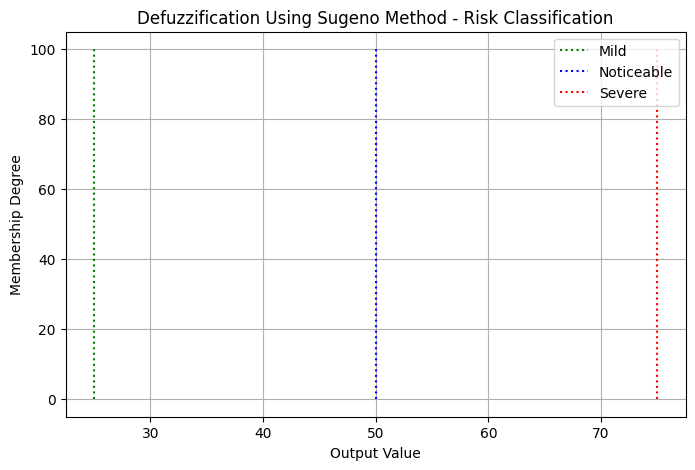

In [596]:
# Visualisasi Menggunakan SUGENO MODEL
plt.figure(figsize=(8,5))

plt.title("Defuzzification Using Sugeno Method - Risk Classification")
plt.vlines(25, 0, 100, linestyles="dotted", colors="g", label="Mild")
plt.vlines(50, 0, 100, linestyles="dotted", colors="b", label="Noticeable")
plt.vlines(75, 0, 100, linestyles="dotted", colors="r", label="Severe")
plt.xlabel("Output Value")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()

In [597]:
# Defuzzification Using Sugeno Method
sugeno_output = {
    "Mild": 25,
    "Noticeable": 50,
    "Severe": 75
}

def defuzzify_sugeno(inference, sugeno_output):
    crisp_numerator = 0
    weight_sum = 0

    for label, weight in inference.items():
        crisp_numerator += sugeno_output[label] * weight
        weight_sum += weight

    return crisp_numerator / weight_sum if weight_sum != 0 else 0

sugeno = [defuzzify_sugeno(inf, sugeno_output) for inf in hasil_inference]

# Menampilkan hasil dan klasifikasi
for i, nilai in enumerate(sugeno[:20]):
    if nilai < 35:
        status = "Mild"
    elif 35 <= nilai < 60:
        status = "Noticeable"
    else:
        status = "Severe"

    print(f"Data {i+1}: Nilai = {nilai:.2f}, Risiko = {status}")

Data 1: Nilai = 50.00, Risiko = Noticeable
Data 2: Nilai = 50.00, Risiko = Noticeable
Data 3: Nilai = 50.00, Risiko = Noticeable
Data 4: Nilai = 51.92, Risiko = Noticeable
Data 5: Nilai = 50.00, Risiko = Noticeable
Data 6: Nilai = 50.00, Risiko = Noticeable
Data 7: Nilai = 0.00, Risiko = Mild
Data 8: Nilai = 0.00, Risiko = Mild
Data 9: Nilai = 50.00, Risiko = Noticeable
Data 10: Nilai = 50.00, Risiko = Noticeable
Data 11: Nilai = 0.00, Risiko = Mild
Data 12: Nilai = 0.00, Risiko = Mild
Data 13: Nilai = 50.00, Risiko = Noticeable
Data 14: Nilai = 50.00, Risiko = Noticeable
Data 15: Nilai = 50.00, Risiko = Noticeable
Data 16: Nilai = 50.00, Risiko = Noticeable
Data 17: Nilai = 0.00, Risiko = Mild
Data 18: Nilai = 50.00, Risiko = Noticeable
Data 19: Nilai = 50.00, Risiko = Noticeable
Data 20: Nilai = 50.00, Risiko = Noticeable


In [598]:
# Defuzzification Using Mamdani Method
def defuzzify_mamdani(inference):
    x = np.linspace(0, 100, 1000)
    aggregated = np.zeros_like(x)

    for label, degree in inference.items():
        if label == 'Mild':
            mf = np.maximum(0, np.minimum(1, (50 - x) / 25))  # Turun dari 1 ke 0 di 25–50
        elif label == 'Noticeable':
            mf = np.maximum(0, np.minimum((x - 25) / 25, (75 - x) / 25))  # Naik-turun (segitiga)
        elif label == 'Severe':
            mf = np.maximum(0, np.minimum(1, (x - 50) / 25))  # Naik dari 0 ke 1 di 50–75
        else:
            mf = np.zeros_like(x)

        aggregated = np.maximum(aggregated, np.minimum(degree, mf))

    if np.sum(aggregated) == 0:
        return 0

    return np.sum(x * aggregated) / np.sum(aggregated)

mamdani = [defuzzify_mamdani(inf) for inf in hasil_inference]

# Menampilkan hasil dan klasifikasi
for i, nilai in enumerate(mamdani[:20]):
    if nilai < 35:
        status = "Mild"
    elif 35 <= nilai < 60:
        status = "Noticeable"
    else:
        status = "Severe"

    print(f"Data {i+1}: Nilai = {nilai:.2f}, Risiko = {status}")



Data 1: Nilai = 50.00, Risiko = Noticeable
Data 2: Nilai = 50.00, Risiko = Noticeable
Data 3: Nilai = 50.00, Risiko = Noticeable
Data 4: Nilai = 52.14, Risiko = Noticeable
Data 5: Nilai = 50.00, Risiko = Noticeable
Data 6: Nilai = 50.00, Risiko = Noticeable
Data 7: Nilai = 0.00, Risiko = Mild
Data 8: Nilai = 0.00, Risiko = Mild
Data 9: Nilai = 50.00, Risiko = Noticeable
Data 10: Nilai = 50.00, Risiko = Noticeable
Data 11: Nilai = 0.00, Risiko = Mild
Data 12: Nilai = 0.00, Risiko = Mild
Data 13: Nilai = 50.00, Risiko = Noticeable
Data 14: Nilai = 50.00, Risiko = Noticeable
Data 15: Nilai = 50.00, Risiko = Noticeable
Data 16: Nilai = 50.00, Risiko = Noticeable
Data 17: Nilai = 0.00, Risiko = Mild
Data 18: Nilai = 50.00, Risiko = Noticeable
Data 19: Nilai = 50.00, Risiko = Noticeable
Data 20: Nilai = 50.00, Risiko = Noticeable


`6. Evaluasi Perbanding Sugeno dan Mamdani menggunakan Accuracy dan F1 Score`

In [599]:
y_true = df['target'].values # Ini buat ambil dari dataset, target itu buat 0 = aman dan 1 = punya penyakit jantung

def fuzzy_to_label(value):
    return 0 if value < 35 else 1  # Ini bacanya jika kecil 35 dianggap sehat, selain itu 1 (Dianggap Sakit), ini buat konverter output fuzzy jadi biner (0 = sehat, 1 = sakit), sugeno dan mamdani disamakan

# Mapping buat hasilnya
y_pred_sugeno = [fuzzy_to_label(v) for v in sugeno] # Ambil data sugeno diatas
y_pred_mamdani = [fuzzy_to_label(v) for v in mamdani] # Ambil data mamdani diatas

# Menampilkan hasil
# Accuracy_score buat melihat prediksi benar dibanding total data
# F1_Scode buat ukur precision dan recall, buat cek keseimbangan data

print("=== Sugeno Evaluation ===")
print("Accuracy:", accuracy_score(y_true, y_pred_sugeno))
print("F1 Score:", f1_score(y_true, y_pred_sugeno))
print("Classification Report:\n", classification_report(y_true, y_pred_sugeno))

print("\n=== Mamdani Evaluation ===")
print("Accuracy:", accuracy_score(y_true, y_pred_mamdani))
print("F1 Score:", f1_score(y_true, y_pred_mamdani))
print("Classification Report:\n", classification_report(y_true, y_pred_mamdani))



=== Sugeno Evaluation ===
Accuracy: 0.5073170731707317
F1 Score: 0.612432847275518
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.24      0.32       499
           1       0.51      0.76      0.61       526

    accuracy                           0.51      1025
   macro avg       0.50      0.50      0.47      1025
weighted avg       0.50      0.51      0.47      1025


=== Mamdani Evaluation ===
Accuracy: 0.5073170731707317
F1 Score: 0.612432847275518
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.24      0.32       499
           1       0.51      0.76      0.61       526

    accuracy                           0.51      1025
   macro avg       0.50      0.50      0.47      1025
weighted avg       0.50      0.51      0.47      1025

